In [1]:
# pip install textblob

## **Importing libraries**

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.metrics import classification_report
from skimpy import skim


[nltk_data] Downloading package vader_lexicon to C:\Users\Tech
[nltk_data]     Assignment 02\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Tech Assignment
[nltk_data]     02\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Tech Assignment
[nltk_data]     02\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load the JSON file into a DataFrame
with open('data.json', 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


## **EDA**

In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3176   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 10     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 1     │                                                          │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ overall  │  0 │    0 │      4.4 │        1 │        1 │        4 │        5 │        5 │        5 │    ▁▂▇ │  │
│ │ unixRevi │  0 │    0 │ 15000000 │ 24000000 │ 13000000 │ 15000000 │ 15000000 │ 15000000 │ 15000000 │     ▅▇ │  │
│ │ ewTime   │    │      │       00 │          │       00 │       00 │       00 │       00 │       00 │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ verified                           │            3079 │                          0.97 │            ▇        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA         ┃ NA %        ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ reviewTime                │          0 │           0 │                          3 │                   9528 │  │
│ │ reviewerID                │          0 │           0 │                          1 │                   3176 │  │
│ │ asin                      │          0 │           0 │                          1 │                   3176 │  │
│ │ reviewerName              │          0 │           0 │                        1.7 │                   5447 │  │
│ │ reviewText                │         16 │         0.5 │                         25 │                  79176 │  │
│ │ summary                   │          0 │           0

In [5]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [6]:
df.isnull().sum()

overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style               69
reviewerName         0
reviewText          16
summary              0
unixReviewTime       0
vote              2879
image             3070
dtype: int64

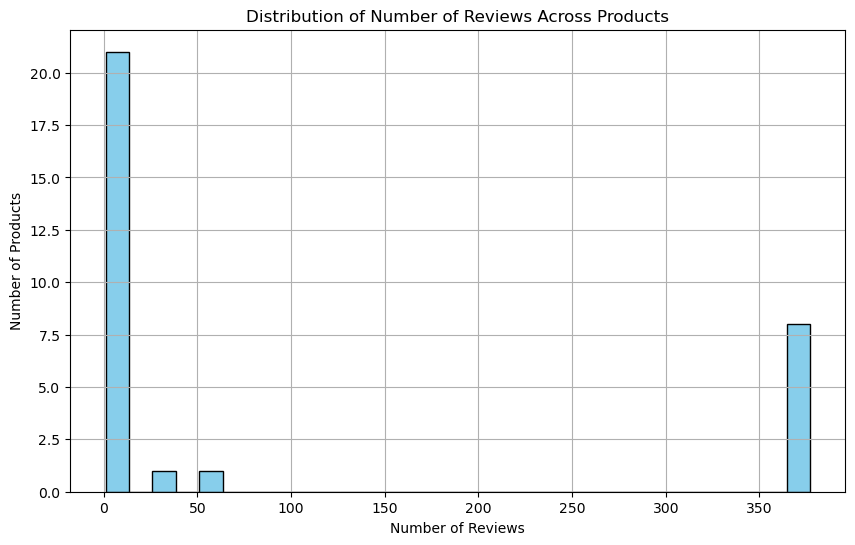

In [7]:
#Distribution of the number of reviews across products
reviews_per_product = df['asin'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(reviews_per_product, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Reviews Across Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()



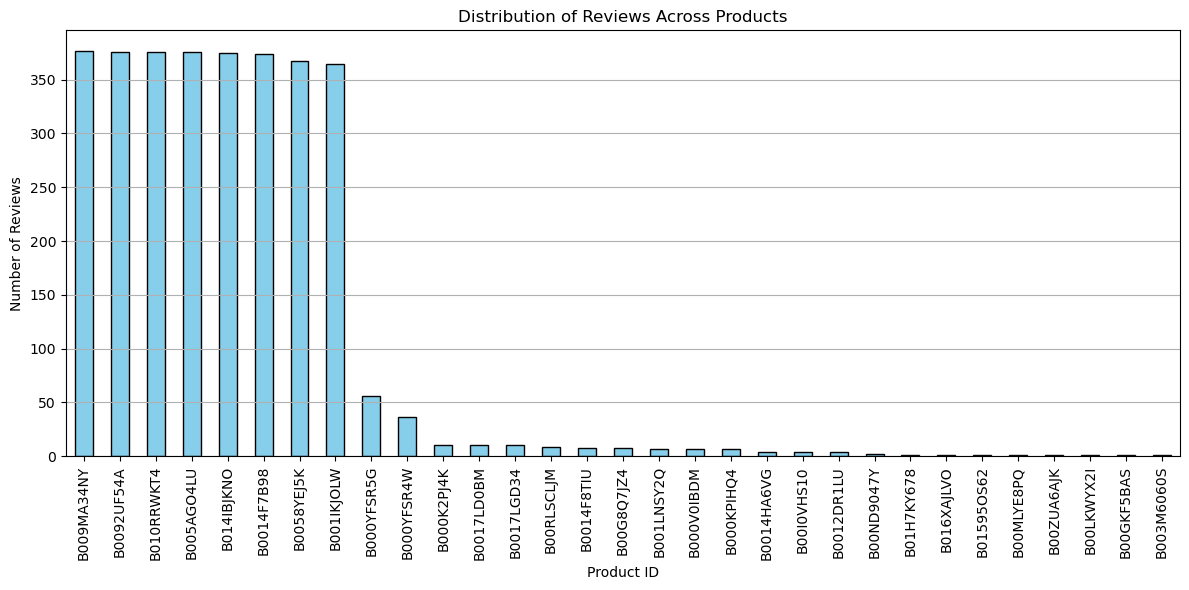

In [8]:
plt.figure(figsize=(12, 6))
reviews_per_product.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Reviews Across Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)  
plt.grid(axis='y')  
plt.tight_layout()  
plt.show()

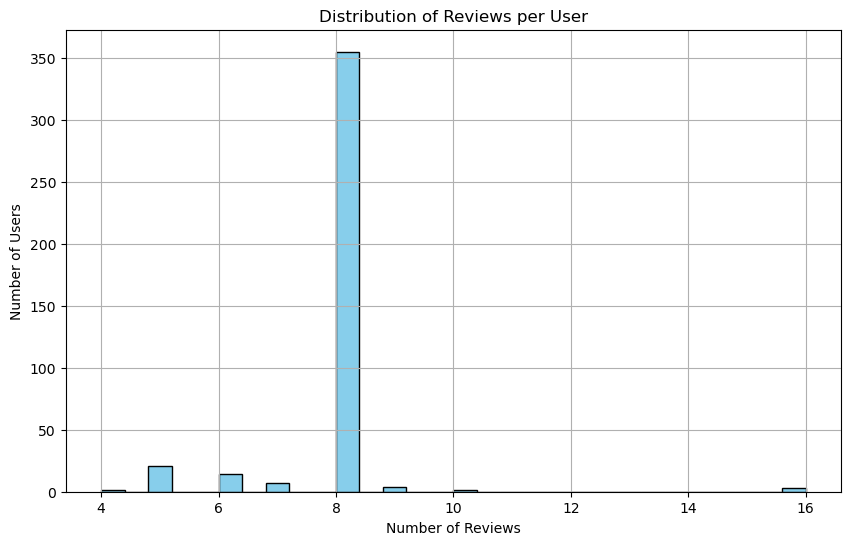

In [9]:
# Distribution of reviews per user
reviews_per_user = df['reviewerID'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(reviews_per_user, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

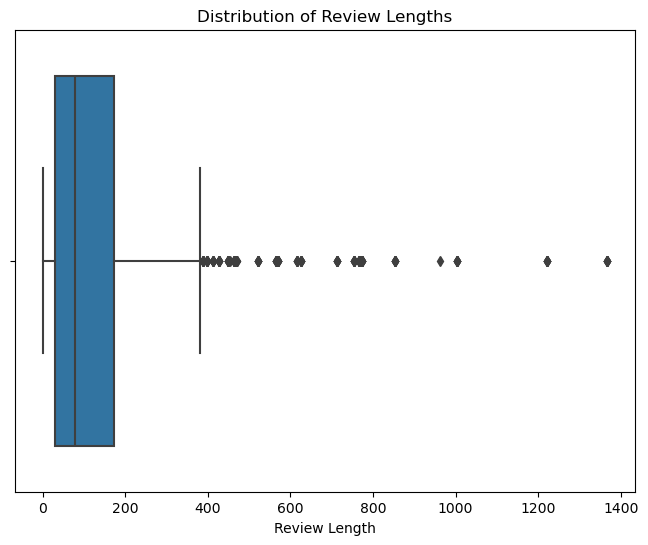

In [10]:
# Analyze review lengths with boxplot
df['review_length'] = df['reviewText'].str.len()
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['review_length'])
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.show()

In [11]:
# Calculate descriptive statistics for review lengths
review_length_stats = df['review_length'].describe()

print("Review Length Statistics:")
print(review_length_stats)

Review Length Statistics:
count    3160.000000
mean      131.780063
std       167.862489
min         1.000000
25%        30.000000
50%        77.500000
75%       173.000000
max      1366.000000
Name: review_length, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


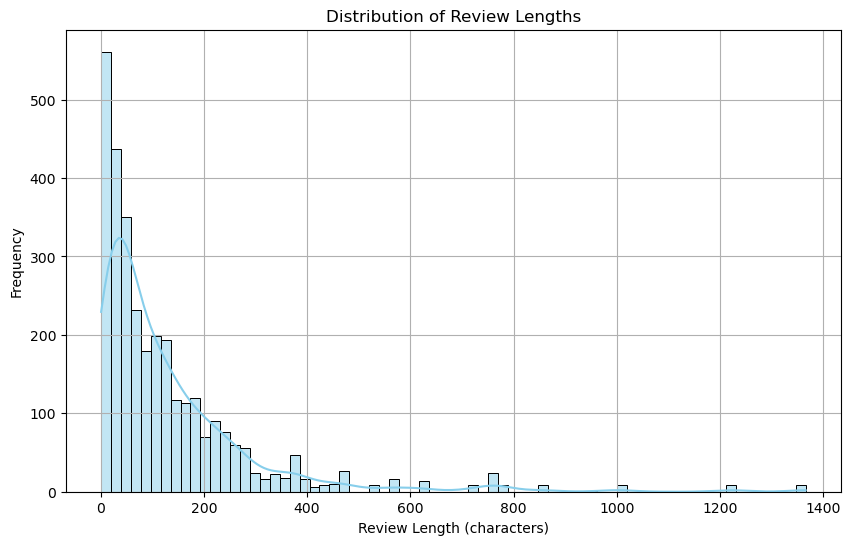

In [12]:
# Plot histogram of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
columns_of_interest = ['overall', 'verified',  'vote']

for column in columns_of_interest:
    unique_values = df[column].unique()
    sum_unique_values = len(unique_values)
    print(f"Unique values in the '{column}' column:")
    print(unique_values)
    print(f"Sum of unique values in the '{column}' column: {sum_unique_values}")
    print()

Unique values in the 'overall' column:
[5. 3. 2. 1. 4.]
Sum of unique values in the 'overall' column: 5

Unique values in the 'verified' column:
[ True False]
Sum of unique values in the 'verified' column: 2

Unique values in the 'vote' column:
[nan '35' '3' '2' '7' '6' '4' '8' '5' '19' '14' '10' '20' '22' '21' '11']
Sum of unique values in the 'vote' column: 16



In [14]:
#duplicate review
duplicate_reviews = df[df.duplicated(subset=['reviewerID', 'asin', 'reviewText'], keep=False)]
len(duplicate_reviews)

167

## **TEXT BASIC PRE-PROCESSING**

In [15]:
# Define a function to label the data 
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# create a new column 'sentiment' based on the rating
df['sentiment_label'] = df['overall'].apply(label_sentiment)

# Checking the changes 
display(df.head())


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_length,sentiment_label
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,24.0,Positive
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,24.0,Positive
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,24.0,Positive
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,24.0,Positive
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,24.0,Positive


In [16]:
df_bkp = df.copy()
# Dropping not usefull columns 
df.drop(columns=['overall', 'reviewerID','asin','style','reviewerName',
                        'unixReviewTime','vote', 'image'], inplace=True)

df.columns

Index(['verified', 'reviewTime', 'reviewText', 'summary', 'review_length',
       'sentiment_label'],
      dtype='object')

In [17]:
df = df[df['review_length'] <= 200]
df

,verified,reviewTime,reviewText,summary,review_length,sentiment_label
0,True,"09 4, 2015",Great product and price!,Five Stars,24.0,Positive
1,True,"09 4, 2015",Great product and price!,Five Stars,24.0,Positive
2,True,"09 4, 2015",Great product and price!,Five Stars,24.0,Positive
3,True,"09 4, 2015",Great product and price!,Five Stars,24.0,Positive
4,True,"09 4, 2015",Great product and price!,Five Stars,24.0,Positive
...,...,...,...,...,...,...
3169,True,"07 5, 2018",I love this shoes they are so comfortable,Five Stars,41.0,Positive
3171,True,"07 2, 2018",Perfect fit!,Five Stars,12.0,Positive
3172,True,"06 28, 2018",My favorite cross trainers!,Comfortable,27.0,Positive
3173,True,"06 25, 2018",Love them fit perfect,Five Stars,21.0,Positive


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


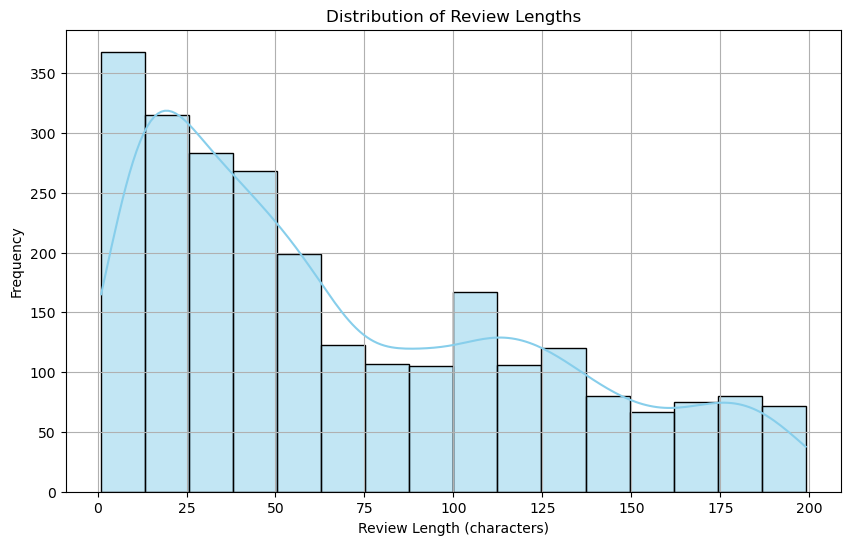

In [18]:
# Plot histogram of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
num_rows = len(df)
print("Number of rows in the DataFrame:", num_rows)


Number of rows in the DataFrame: 2535


In [20]:
# Print the first 10 contents of the reviewText column
for review_text in df['reviewText'].head(10):
    print(review_text)

Great product and price!
Great product and price!
Great product and price!
Great product and price!
Great product and price!
Waaay too small. Will use for futur children!
Stays vibrant after many washes
Stays vibrant after many washes
My son really likes the pink. Ones which I was nervous about
Waaay too small. Will use for future child.


In [21]:
text_data = df['reviewText']

In [22]:
# Define a function to perform all pre-processing steps
def preprocess_text(text):
    # Lowercasing
    text_lower = text.lower()
    
    # Removing Punctuation
    text_no_punct = text_lower.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    text_tokens = word_tokenize(text_no_punct)
    
    # Removing Stopwords
    stop_words = set(stopwords.words('english'))
    text_no_stopwords = [word for word in text_tokens if word not in stop_words]
    
    # Combine tokens into a single string
    processed_text = ' '.join(text_no_stopwords)
    
    return processed_text

In [23]:
# Apply the pre-processing function to create the new column
df['processedText'] = text_data.apply(preprocess_text)

In [24]:
df.head()

,verified,reviewTime,reviewText,summary,review_length,sentiment_label,processedText
0,True,"09 4, 2015",Great product and price!,Five Stars,24.0,Positive,great product price
1,True,"09 4, 2015",Great product and price!,Five Stars,24.0,Positive,great product price
2,True,"09 4, 2015",Great product and price!,Five Stars,24.0,Positive,great product price
3,True,"09 4, 2015",Great product and price!,Five Stars,24.0,Positive,great product price
4,True,"09 4, 2015",Great product and price!,Five Stars,24.0,Positive,great product price


In [25]:
df.drop(columns=['verified', 'reviewTime','summary','review_length','reviewText'], inplace=True)

df.columns

Index(['sentiment_label', 'processedText'], dtype='object')

In [26]:
# Randomly select 1000 reviews from the dataset
df_sampled = df.sample(n=1000, random_state=26) 

df_sampled


,sentiment_label,processedText
2165,Positive,fast shipping turned expected couldnt happier
2628,Negative,less week sole ripped outside shoe
1655,Positive,confortable
2770,Positive,best tennis shoes ive life comfortable box wou...
185,Positive,comfortable athletic shoe good gym ellipical t...
...,...,...
330,Positive,good quality
575,Positive,love light color great
896,Neutral,great look zero support inside shoe buy expens...
2843,Positive,comfortable light


## **MODELING (VADER AND TEXTBLOB)**

In [27]:
# Initialize VADER
vader_analyzer = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis
def analyze_sentiment_vader(text):
    sentiment_score = vader_analyzer.polarity_scores(text)
    # Classify sentiment based on compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [28]:
# Function to apply TextBlob sentiment analysis
def analyze_sentiment_textblob(text):
    sentiment = TextBlob(text).sentiment.polarity
    # Classify sentiment based on polarity score
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [29]:
# Apply sentiment analysis to the pre-processed text data
df_sampled['sentiment_vader'] = df_sampled['processedText'].apply(analyze_sentiment_vader)
df_sampled['sentiment_textblob'] = df_sampled['processedText'].apply(analyze_sentiment_textblob)


In [30]:
display(df_sampled[['processedText', 'sentiment_label', 'sentiment_vader', 'sentiment_textblob']])

,processedText,sentiment_label,sentiment_vader,sentiment_textblob
2165,fast shipping turned expected couldnt happier,Positive,Negative,Positive
2628,less week sole ripped outside shoe,Negative,Neutral,Negative
1655,confortable,Positive,Neutral,Neutral
2770,best tennis shoes ive life comfortable box wou...,Positive,Positive,Positive
185,comfortable athletic shoe good gym ellipical t...,Positive,Positive,Positive
...,...,...,...,...
330,good quality,Positive,Positive,Positive
575,love light color great,Positive,Positive,Positive
896,great look zero support inside shoe buy expens...,Neutral,Positive,Positive
2843,comfortable light,Positive,Positive,Positive


## **VALIDATION**

In [31]:
# Generate classification reports for both models
vader_report = classification_report(df_sampled['sentiment_label'], df_sampled['sentiment_vader'], output_dict=True)
textblob_report = classification_report(df_sampled['sentiment_label'], df_sampled['sentiment_textblob'], output_dict=True)

# Display comparison table
comparison_table = pd.DataFrame({
    "": ['Precision', 'Recall', 'F1-Score'],
    "VADER Positive": [vader_report['Positive']['precision'], vader_report['Positive']['recall'], vader_report['Positive']['f1-score']],
    "VADER Negative": [vader_report['Negative']['precision'], vader_report['Negative']['recall'], vader_report['Negative']['f1-score']],
    "VADER Neutral": [vader_report['Neutral']['precision'], vader_report['Neutral']['recall'], vader_report['Neutral']['f1-score']],
    "TextBlob Positive": [textblob_report['Positive']['precision'], textblob_report['Positive']['recall'], textblob_report['Positive']['f1-score']],
    "TextBlob Negative": [textblob_report['Negative']['precision'], textblob_report['Negative']['recall'], textblob_report['Negative']['f1-score']],
    "TextBlob Neutral": [textblob_report['Neutral']['precision'], textblob_report['Neutral']['recall'], textblob_report['Neutral']['f1-score']]
})

print("Comparison of Sentiment Analysis Models:")
print(comparison_table)

Comparison of Sentiment Analysis Models:
              VADER Positive  VADER Negative  VADER Neutral  \
0  Precision        0.888120        0.235294       0.232323   
1     Recall        0.914489        0.137931       0.230000   
2   F1-Score        0.901112        0.173913       0.231156   

   TextBlob Positive  TextBlob Negative  TextBlob Neutral  
0           0.877153           0.444444          0.120000  
1           0.907363           0.413793          0.090000  
2           0.892002           0.428571          0.102857  
